<a href="https://colab.research.google.com/github/cherrysober/Data-Mining/blob/main/Checkpoint_5_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Pola Pembelian dan Preferensi Pelanggan Selama Black Friday**

#**Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

**Library untuk Splitting Data**

In [2]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [3]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan dari analisis dataset penjualan Black Friday adalah untuk mendapatkan wawasan yang mendalam tentang identitas konsumen serta perilaku pembelian konsumen selama periode penjualan ini. Untuk dapat dipahami lebih mendalam tentang preferensi dan kebiasaan pembelian pelanggan, sehingga dengan adanya analisis ini dapat meningkatkan efektivitas strategi pemasaran dan penjualan selama Black Friday.

##**Assess Situation**

Situasi keadaan yang mendasari analisis ini merupakan fenomena yang cukup penting dalam industri ritel, khususnya di Amerika Serikat, di mana Black Friday telah menjadi salah satu periode penjualan paling berkesan dan paling sibuk dalam setahun. Dengan semakin meningkatnya persaingan dan juga meningkatnya ekspektasi konsumen, pemahaman yang mendalam tentang perilaku pembelian selama Black Friday ini menjadi hal yang cukup penting untuk dianalisa.

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset yang akan saya analisa ini adalah untuk mengidentifikasi pola pembelian yang signifikan, menganalisis faktor-faktor yang mempengaruhi keputusan pembelian selama Black Friday, dan memprediksi penjualan produk berdasarkan variabel seperti harga, promosi, dan fitur produk.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan melakukan survey data transaksi penjualan selama Black Friday dari sumber yang terkait. Selanjutnya, melakukan eksplorasi data untuk memahami identitas pelanggan, kategori produk yang diminati, dan pola pembelian yang signifikan. Kemudian, model akan dibangun untuk memprediksi penjualan berdasarkan faktor-faktor yang relevan. Akhirnya, hasil analisis akan diinterpretasikan untuk memberikan wawasan yang berguna bagi strategi pemasaran dan penjualan selama Black Friday yang akan datang lagi.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data yang saya dapatkan saya peroleh dari Kaggle, karena saya ingin mencari data retail maka saya memilih dataset dari penjualan Black Friday.

Link dataset: [https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda](https://)

In [5]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


1. **User_ID**: Identifikasi unik untuk setiap pengguna.
2. **Product_ID**: Identifikasi unik untuk setiap produk.
3. **Gender**: Jenis kelamin pelanggan (F untuk perempuan, M untuk laki-laki).
4. **Age**: Rentang usia pelanggan.
5. **Occupation**: Kode pekerjaan pelanggan.
6. **City_Category**: Kategori kota tempat pelanggan tinggal (A, B, atau C).
7. **Stay_In_Current_City_Years**: Jumlah tahun pelanggan tinggal di kota saat ini.
8. **Marital_Status**: Status pernikahan pelanggan (0 untuk lajang, 1 untuk menikah).
9. **Product_Category_1**: Kategori 1 dari produk yang dibeli.
10. **Product_Category_2**: Kategori 2 dari produk yang dibeli (jika tersedia).
11. **Product_Category_3**: Kategori 3 dari produk yang dibeli (jika tersedia).
12. **Purchase**: Jumlah pembelian dalam dolar.

##**Describe Data**

####Informasi Dasar

In [6]:
jumlah_baris, jumlah_kolom = df.shape
jjumlah_baris = "Jumlah baris"
jjumlah_kolom = "Jumlah kolom"
judul_dan_jumlah_baris = f"{jjumlah_baris}: {jumlah_baris}"
judul_dan_jumlah_kolom = f"{jjumlah_kolom}: {jumlah_kolom}"
judul_dan_jumlah_baris, judul_dan_jumlah_kolom

('Jumlah baris: 316202', 'Jumlah kolom: 12')

Dataset ini terdiri dari 550.068 baris data dan 12 kolom, dapat dibayangkan gambaran volume transaksi atau observasi yang signifikan serta berbagai fitur seperti identifikasi pelanggan, atribut produk, dan informasi lokasi pelanggan.



####Informasi Lanjutan

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316202 entries, 0 to 316201
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     316202 non-null  int64  
 1   Product_ID                  316202 non-null  object 
 2   Gender                      316202 non-null  object 
 3   Age                         316202 non-null  object 
 4   Occupation                  316202 non-null  int64  
 5   City_Category               316202 non-null  object 
 6   Stay_In_Current_City_Years  316202 non-null  object 
 7   Marital_Status              316202 non-null  int64  
 8   Product_Category_1          316202 non-null  int64  
 9   Product_Category_2          218357 non-null  float64
 10  Product_Category_3          97208 non-null   float64
 11  Purchase                    316202 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 28.9+ MB


1. **User_ID**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini berisi ID unik untuk setiap pengguna yang terlibat dalam transaksi.

2. **Product_ID**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini berisi ID unik untuk setiap produk yang dibeli dalam transaksi.

3. **Gender**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan jenis kelamin dari pengguna yang terlibat dalam transaksi.

4. **Age**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan rentang usia pengguna yang terlibat dalam transaksi.

5. **Occupation**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini berisi kode yang menunjukkan pekerjaan pengguna yang terlibat dalam transaksi.

6. **City_Category**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan kategori kota tempat pengguna yang terlibat dalam transaksi tinggal.

7. **Stay_In_Current_City_Years**:
Jumlah: 550.068 entri.
Tipe Data: Object (string).
Kolom ini menunjukkan berapa tahun pengguna yang terlibat dalam transaksi telah tinggal di kota saat ini.

8. **Marital_Status**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini menunjukkan status pernikahan pengguna yang terlibat dalam transaksi (1 untuk sudah menikah, 0 untuk belum menikah).

9. **Product_Category_1**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini merupakan kategori utama dari produk yang dibeli dalam transaksi.

10. **Product_Category_2**:
Jumlah: 376.430 entri (beberapa entri kosong).
Tipe Data: Float (float64).
Kolom ini merupakan kategori tambahan dari produk yang dibeli dalam transaksi.

11. **Product_Category_3**:
Jumlah: 166.821 entri (banyak entri kosong).
Tipe Data: Float (float64).
Kolom ini merupakan kategori tambahan lainnya dari produk yang dibeli dalam transaksi.

12. **Purchase**:
Jumlah: 550.068 entri.
Tipe Data: Integer (int64).
Kolom ini merupakan jumlah pembelian (dalam satuan mata uang) yang terjadi dalam transaksi.

####Informasi Statistik Deskriptif

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,3.162020e+05,316202.000000,316202.000000,316202.000000,218357.000000,97208.000000,316202.000000
mean,1.002991e+06,8.074965,0.410491,5.290457,9.836035,12.656397,9326.818648
std,1.744678e+03,6.522628,0.491924,3.747141,5.087572,4.127369,4974.477042
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,158.000000
25%,1.001449e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5868.000000
50%,1.003032e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004457e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12065.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


1. **User_ID**: Kolom ini berisi ID unik untuk setiap pengguna atau pembeli. Dalam statistik deskriptif, jumlah baris (count) adalah 550068, yang menunjukkan bahwa terdapat 550068 entri non-null dalam kolom ini. Mean (rata-rata) User_ID adalah sekitar 1.003029e+06, dengan standar deviasi (std) sekitar 1.727592e+03. Nilai minimum (min) adalah 1.000001e+06, dan nilai maksimum (max) adalah 1.006040e+06.

2. **Occupation**: Ini merupakan kolom yang mendefinisikan pekerjaan atau profesi dari pengguna. Jumlah baris (count) adalah 550068, menunjukkan bahwa tidak ada nilai yang hilang dalam kolom ini. Mean dari occupation adalah sekitar 8.08, dengan standar deviasi sekitar 6.52. Nilai minimum adalah 0, yang mungkin menunjukkan pengangguran, sementara nilai maksimum adalah 20, yang mungkin menunjukkan profesi tertentu.

3. **Marital_Status**: Kolom ini menunjukkan status perkawinan pengguna, di mana 0 mungkin menunjukkan belum menikah dan 1 menunjukkan sudah menikah. Jumlah baris (count) adalah 550068, menunjukkan tidak ada nilai yang hilang. Mean dari marital status adalah sekitar 0.41, dengan standar deviasi sekitar 0.49. Nilai minimum adalah 0 dan maksimum adalah 1, sesuai dengan kategori status perkawinan.

4. **Product_Category_1**, **Product_Category_2**, dan **Product_Category_3**: Kolom-kolom ini berisi kategori produk yang dibeli oleh pengguna. Terdapat beberapa nilai yang hilang pada kolom Product_Category_2 dan Product_Category_3, dengan jumlah baris (count) masing-masing adalah 376430 dan 166821. Untuk setiap kolom kategori produk, mean, std, min, 25%, 50%, 75%, dan max menunjukkan statistik terkait dengan kategori produk yang dibeli.

5. **Purchase**: Ini adalah kolom numerik yang menunjukkan jumlah pembelian produk dalam satuan mata uang yang relevan (misalnya, dolar). Jumlah baris (count) adalah 550068, yang menunjukkan tidak ada nilai yang hilang dalam kolom ini. Mean pembelian adalah sekitar 9263.97, dengan standar deviasi sekitar 5023.07. Nilai minimum pembelian adalah 12, dan nilai maksimum adalah 23961. Ini memberikan gambaran tentang sebaran jumlah pembelian produk oleh pengguna.

##**Exploratory Data Analysis**

Text(0.5, 1.0, 'Perbandingan Jenis Kelamin Pembeli')

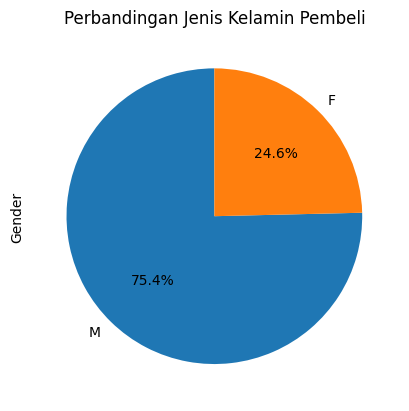

In [9]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Jenis Kelamin Pembeli')

* Proporsi perempuan (**24.7%**): Ini menunjukkan bahwa sekitar 24.7% dari total pembeli pada acara Black Friday Sales adalah perempuan. Ini berarti dari keseluruhan jumlah pembeli, hampir seperempatnya adalah perempuan.

* Proporsi laki-laki (**75.3%**): Ini menunjukkan bahwa sekitar 75.3% dari total pembeli pada acara Black Friday Sales adalah laki-laki. Artinya, mayoritas pembeli pada acara tersebut adalah laki-laki, dengan proporsi yang jauh lebih besar dari perempuan.

Text(0.5, 1.0, 'Perbandingan Kota para Pembeli')

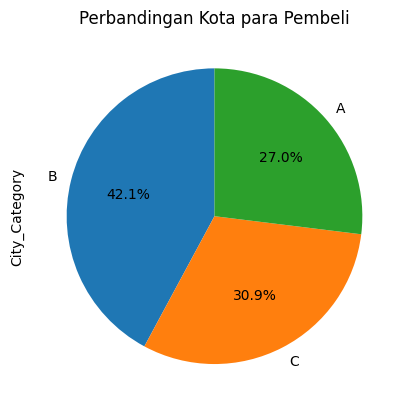

In [10]:
gender_counts = df['City_Category'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Kota para Pembeli')

* Kota A (**26.9%**): Menunjukkan bahwa sekitar 26.9% dari semua pembeli berasal dari kota A. Persentase ini mengindikasikan bahwa kota A memiliki kontribusi yang signifikan terhadap total penjualan selama Black Friday Sales.

* Kota B (**42%**): Menunjukkan bahwa mayoritas pembeli, yaitu sekitar 42%, berasal dari kota B. Persentase yang cukup tinggi ini menunjukkan bahwa kota B mungkin merupakan pasar yang sangat penting atau populer selama acara Black Friday Sales.

* Kota C (**31.1%**): Merupakan persentase pembeli yang berasal dari kota C, sekitar 31.1%. Meskipun persentase ini lebih rendah dari kota B, namun masih menunjukkan kontribusi yang signifikan terhadap total penjualan.

Text(0.5, 1.0, 'Perbandingan Status Pernikahan para Pembeli')

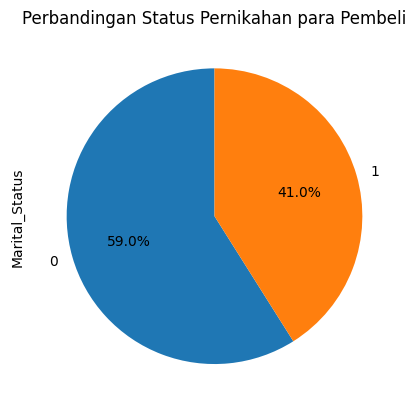

In [11]:
gender_counts = df['Marital_Status'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Status Pernikahan para Pembeli')

Sekitar **59%** dari pembeli Black Friday Sales belum menikah, sedangkan **41%** sudah menikah. Persentase ini menggambarkan distribusi relatif dari dua kategori status pernikahan di antara pembeli selama peristiwa Black Friday Sales.

Pemahaman yang lebih dalam tentang perilaku pembelian dari kedua kelompok status pernikahan ini merupakan strategi pemasaran yang dapat membantu secara lebih efektif. Misalnya, mungkin ada preferensi produk yang berbeda serta anggaran pembelian yang berbeda.

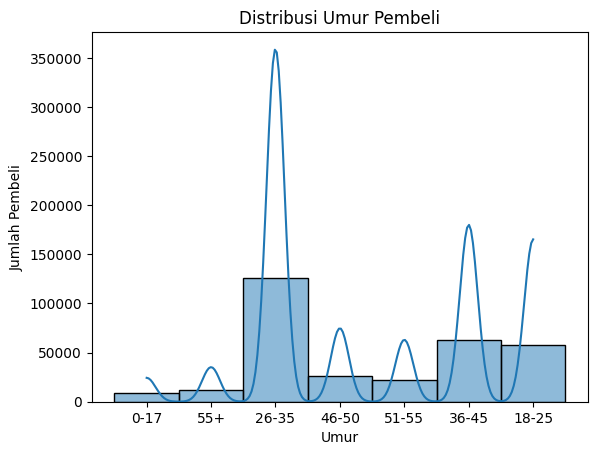

In [12]:
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Distribusi Umur Pembeli')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pembeli')
plt.show()

* **0-17** tahun paling sedikit: Jumlah pembeli dalam kelompok usia ini mungkin paling sedikit karena mereka masih tergolong sebagai anak-anak atau remaja, dan mungkin memiliki keterbatasan finansial atau keterbatasan akses untuk berbelanja pada acara seperti Black Friday.

* **55+** tahun lebih banyak dari 0-17 tahun namun tetap lebih sedikit dari yang lain: Kelompok usia ini mungkin lebih banyak dari kelompok usia 0-17 tahun karena mereka adalah konsumen dewasa yang memiliki penghasilan dan kemampuan belanja yang lebih besar. Namun, jumlahnya tetap lebih sedikit dibandingkan dengan kelompok usia yang lebih muda (seperti 26-35 tahun) karena faktor-faktor seperti keterbatasan mobilitas atau preferensi belanja yang berbeda.

* **26-35** dengan histogram paling tinggi: Kelompok usia ini mungkin memiliki jumlah pembeli yang paling tinggi karena mereka seringkali berada di tahap hidup di mana mereka telah memasuki pasar kerja dan memiliki penghasilan yang cukup untuk melakukan pembelian besar-besaran seperti pada acara Black Friday.

* **46-50** tahun menempati posisi ke empat terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang signifikan karena mereka seringkali berada di tahap hidup di mana mereka memiliki penghasilan yang stabil dan juga mungkin memiliki kebutuhan untuk membeli barang-barang konsumen seperti elektronik, perabotan rumah tangga, dan lain-lain.

* **51-55** tahun dengan posisi ke lima terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang cukup signifikan karena mereka masih aktif secara ekonomi dan memiliki daya beli yang cukup untuk berbelanja pada acara Black Friday.

* **36-45** tahun dengan posisi kedua terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang tinggi karena mereka seringkali berada di tahap hidup di mana mereka telah memiliki penghasilan yang stabil, mungkin telah menikah, dan mungkin memiliki tanggungan keluarga yang memerlukan pembelian barang-barang konsumen secara teratur.

* **18-25** dengan posisi ketiga terbanyak: Kelompok usia ini mungkin memiliki jumlah pembeli yang signifikan karena mereka seringkali berada di tahap awal kehidupan dewasa di mana mereka mulai memperoleh penghasilan dan memiliki kebebasan finansial untuk berbelanja secara independen.

<ipython-input-13-833c96efcb5e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

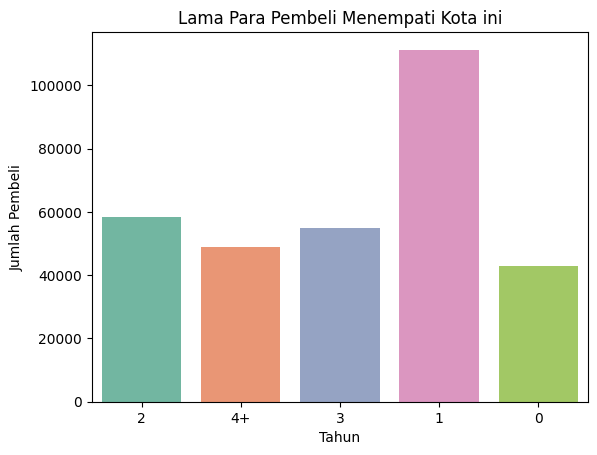

In [13]:
sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='Set2')
plt.title('Lama Para Pembeli Menempati Kota ini')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pembeli')

* Pembeli yang telah menempati kota selama **1 tahun** memiliki jumlah tertinggi, hampir menyentuh 200.000. Ini mungkin menunjukkan bahwa ada banyak pembeli baru yang baru-baru ini pindah atau baru tinggal di kota tersebut selama satu tahun terakhir. Kemungkinan besar ini adalah pembeli yang baru saja menetap di kota dan mungkin menjadi target pasar yang menarik bagi berbagai layanan dan produk.

* Pembeli yang telah menempati kota selama **2 tahun** jumlahnya sekitar 100.000. Ini menunjukkan bahwa ada jumlah yang signifikan dari pembeli yang telah tinggal di kota tersebut selama dua tahun terakhir. Mungkin ini mencerminkan pembeli yang stabil atau yang telah menetap untuk jangka waktu yang lebih lama dan mungkin memiliki pola belanja yang berbeda.

* Pembeli yang telah menempati kota selama **3 tahun** jumlahnya sekitar 95.000. Ini menunjukkan bahwa masih ada sejumlah besar pembeli yang telah tinggal di kota tersebut selama tiga tahun terakhir. Hal ini mungkin menunjukkan adanya kelompok pembeli yang telah menjadi bagian dari komunitas yang lebih mapan di kota tersebut.

* Pembeli yang telah menempati kota selama **4 tahun** atau lebih memiliki jumlah sekitar 85.000. Ini menunjukkan bahwa ada juga kelompok pembeli yang telah menetap di kota tersebut untuk jangka waktu yang lebih lama, namun jumlahnya sedikit lebih rendah dibandingkan dengan mereka yang telah menetap selama 2 atau 3 tahun.

* Pembeli yang baru-baru ini pindah ke kota tersebut, yaitu mereka yang telah menempati kota selama **0 tahun**, memiliki jumlah sekitar 75.000. Ini mungkin mencerminkan jumlah pembeli baru atau migrasi baru ke kota tersebut pada saat pengumpulan data. Hal ini juga mungkin mencerminkan peningkatan populasi atau perubahan demografis di kota tersebut.

<ipython-input-14-7b15502e5850>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_1', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

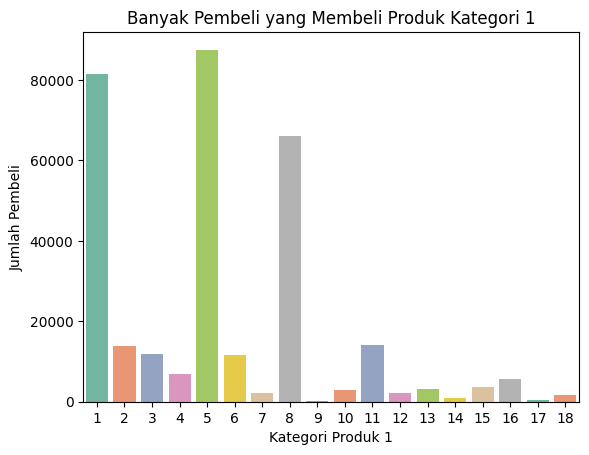

In [14]:
sns.countplot(x='Product_Category_1', data=df, palette='Set2')
plt.title('Banyak Pembeli yang Membeli Produk Kategori 1')
plt.xlabel('Kategori Produk 1')
plt.ylabel('Jumlah Pembeli')

* Kategori produk nomor 5 memiliki jumlah pembelian yang paling tinggi, yaitu sekitaran 150.000. Ini menunjukkan bahwa produk kategori 5 adalah yang paling diminati oleh pembeli.

* Kategori produk nomor 8 memiliki jumlah pembelian tertinggi ketiga, yaitu sekitaran 110.000. Ini menunjukkan bahwa produk kategori 8 juga cukup diminati oleh pembeli.

* Beberapa kategori produk memiliki jumlah pembelian yang rendah, seperti nomor 7, 9, 14, dan 17. Hal ini mungkin disebabkan oleh produk-produk ini kurang populer atau mungkin tidak relevan dengan kebutuhan pasar saat ini.

* Beberapa kategori produk memiliki jumlah pembelian yang mendekati atau bahkan di bawah 5.000, seperti nomor 7, 14, dan 17. Ini menunjukkan bahwa produk-produk ini mungkin kurang diminati oleh pembeli atau mungkin ada faktor lain yang menyebabkan kurangnya minat.

* Beberapa kategori produk memiliki jumlah pembelian yang cukup bervariasi, seperti nomor 1, 2, 3, 4, 6, 10, 11, 12, 13, 15, 16, 18, 19, dan 20. Ini menunjukkan bahwa preferensi pembeli bervariasi tergantung pada jenis produk dan fitur yang ditawarkan.

Hasil data sedemikian rupa mungkin karena berbagai faktor, termasuk preferensi dan kebiasaan pembeli, tren pasar, promosi produk, dan banyak lagi.

<ipython-input-15-36f5235e8825>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_2', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

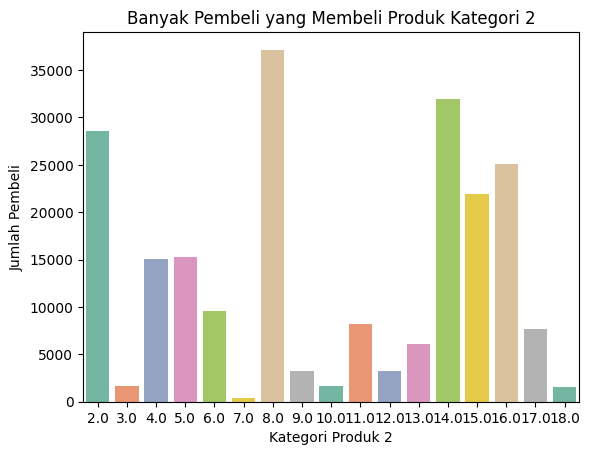

In [15]:
sns.countplot(x='Product_Category_2', data=df, palette='Set2')
plt.title('Banyak Pembeli yang Membeli Produk Kategori 2')
plt.xlabel('Kategori Produk 2')
plt.ylabel('Jumlah Pembeli')

* Pembelian produk dengan Kategori 2 nomor 2.0 memiliki jumlah pembelian yang signifikan sebanyak hampir 49.000. Hal ini menunjukkan bahwa produk dengan Kategori 1 nomor 2.0 sangat diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 3.0 memiliki jumlah pembelian di atas 0, tetapi tidak banyak. Ini mungkin menunjukkan bahwa produk dengan Kategori 1 nomor 3.0 kurang diminati atau memiliki permintaan yang rendah.

* Pembelian produk dengan Kategori 2 nomor 4.0 memiliki jumlah pembelian yang cukup besar kisaran sebanyak 28.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 4.0 juga memiliki permintaan yang cukup tinggi.

* Pembelian produk dengan Kategori 2 nomor 5.0 memiliki jumlah pembelian kisaran sebanyak 29.000, yang menunjukkan bahwa produk ini cukup diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 6.0 memiliki jumlah pembelian kisaran sebanyak 15.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 6.0 memiliki permintaan yang cukup stabil, meskipun tidak sebanyak produk dengan nomor 2.0, 4.0, atau 5.0.

* Pembelian produk dengan Kategori 2 nomor 7.0 merupakan yang paling rendah, yang mungkin menunjukkan bahwa produk dengan nomor ini kurang diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 8.0 memiliki jumlah pembelian yang sangat tinggi, yaitu di atas 60.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 8.0 adalah yang paling diminati oleh pembeli.

* Pembelian produk dengan Kategori 2 nomor 9.0, 10.0, 11.0, 12.0, dan 13.0 memiliki jumlah pembelian yang cukup rendah, masing-masing sekitar 8.000, 5.000, 15.000, 6.000, dan 10.000. Ini menunjukkan bahwa produk dengan nomor ini memiliki permintaan yang lebih rendah dibandingkan dengan produk dengan nomor yang lebih tinggi.

* Pembelian produk dengan Kategori 2 nomor 14.0 memiliki jumlah pembelian tertinggi kedua setelah nomor 8.0, yaitu kisaran sebanyak 55.000. Ini menunjukkan bahwa produk dengan Kategori 1 nomor 14.0 memiliki permintaan yang cukup tinggi.

* Pembelian produk dengan Kategori 2 nomor 15.0 dan 16.0 memiliki jumlah pembelian yang cukup stabil, masing-masing sekitar 35.000 dan 40.000. Ini menunjukkan bahwa produk dengan nomor ini memiliki permintaan yang cukup stabil.

* Pembelian produk dengan Kategori 2 nomor 17.0 dan 18.0 memiliki jumlah pembelian yang relatif rendah, masing-masing sekitar 12.000 dan 3.000. Ini menunjukkan bahwa produk dengan nomor ini memiliki permintaan yang rendah.

<ipython-input-16-b49488f6c7d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_3', data=df, palette='Set2')


Text(0, 0.5, 'Jumlah Pembeli')

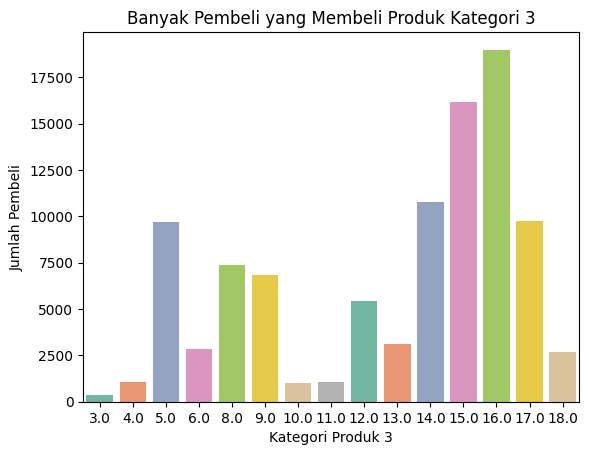

In [16]:
sns.countplot(x='Product_Category_3', data=df, palette='Set2')
plt.title('Banyak Pembeli yang Membeli Produk Kategori 3')
plt.xlabel('Kategori Produk 3')
plt.ylabel('Jumlah Pembeli')

* Nomor 3.0 memiliki jumlah pembelian yang hampir nol. Ini mungkin menunjukkan bahwa produk dengan kategori ini tidak populer di antara pembeli.
* Nomor 4.0 memiliki jumlah pembelian sekitar 5.000. Ini menunjukkan bahwa produk dengan kategori ini memiliki sedikit minat dari pembeli, tetapi masih ada beberapa yang membeli.
* Nomor 5.0 memiliki jumlah pembelian sekitar 20.000, menunjukkan bahwa produk dengan kategori ini cukup populer di antara pembeli.
Fenomena yang serupa terjadi dengan nomor 6.0 dan 8.0, di mana keduanya memiliki jumlah pembelian sekitar 5.000 dan 15.000, masing-masing.
* Nomor 9.0 memiliki lebih dari 10.000 pembelian, menunjukkan popularitas yang cukup tinggi.
* Nomor 10.0, 11.0, dan 18.0 memiliki jumlah pembelian yang lebih rendah, kurang dari 5.000. Ini mungkin menunjukkan bahwa produk dengan kategori ini adalah produk niche atau kurang diminati oleh pembeli.
* Nomor 12.0 memiliki jumlah pembelian sekitar 10.000, menunjukkan minat yang cukup baik dari pembeli.
* Nomor 13.0 memiliki lebih dari 5.000 pembelian, menunjukkan popularitas yang cukup baik.
* Nomor 14.0, 15.0, 16.0, dan 17.0 memiliki jumlah pembelian yang signifikan, masing-masing hampir 20.000, hampir 30.000, lebih dari 30.000, dan lebih dari 15.000. Ini menunjukkan bahwa produk dengan kategori ini sangat diminati oleh pembeli.

## Perbandingan Penjualan Kategori Produk 1, 2, dan 3
* **Kategori Produk 1**:
Terdapat variasi dalam jumlah pembelian, dari hampir nol hingga lebih dari 140.000
Beberapa kategori memiliki jumlah pembelian yang signifikan, menunjukkan popularitas yang paling tinggi di antara pembeli.
Namun, beberapa kategori memiliki jumlah pembelian yang rendah, mungkin karena kurang diminatinya oleh pembeli.

* **Kategori Produk 2**:
Jumlah pembelian juga bervariasi dari hampir nol hingga lebih dari 60.000.
Terdapat kategori produk dengan jumlah pembelian tertinggi kedua setelah kategori 1, menunjukkan popularitas yang cukup tinggi.
Namun, ada juga beberapa kategori produk dengan jumlah pembelian yang rendah.

* **Kategori Produk 3**:
Jumlah pembelian terlihat beragam, dengan beberapa kategori memiliki jumlah pembelian yang cukup rendah dan lainnya memiliki jumlah pembelian yang sangat tinggi.
Terlihat bahwa beberapa kategori memiliki popularitas yang sangat tinggi, sementara yang lain mungkin kurang diminati oleh pembeli.
Dari perbandingan di atas, terlihat bahwa kategori produk 1 dan 2 memiliki rentang jumlah pembelian yang lebih luas, sementara kategori produk 3 memiliki beberapa kategori dengan jumlah pembelian yang sangat tinggi. Hal ini menunjukkan bahwa preferensi pembeli bervariasi tergantung pada jenis produk dan fitur yang ditawarkan dalam setiap kategori.

#**Verify Data Quality**

## Missing Values

In [17]:
print((df.isna().sum() / len(df)) * 100)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.943827
Product_Category_3            69.257626
Purchase                       0.000000
dtype: float64


1. **User_ID**, **Product_ID**, **Gender**, **Age**, **Occupation**, **City_Category**, **Stay_In_Current_City_Years**, **Marital_Status**, **Product_Category_1**, dan **Purchase**: Tidak ada missing values pada kolom ini, yang berarti setiap baris dalam dataset memiliki ID pengguna dan ID produk yang terkait (untuk User ID dan Product ID). Untuk kolom yang lainnya dapat dipastikan bahwa data sudah lengkap untuk masing-masing atribut.

2. **Product_Category_2**: Terdapat sekitar 31.57% missing values dalam kolom ini. Hal ini mungkin dikarenakan bahwa tidak semua produk memiliki kategori tambahan yang terkait.

3. **Product_Category_3**: Persentase nilai yang hilang dalam kolom ini cukup tinggi, sekitar 69.67% dapat diketahui bahwa mayoritas produk tidak memiliki kategori tambahan kedua.

### Nilai Kosong pada Product Category 2

In [18]:
df[df['Product_Category_2'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
...,...,...,...,...,...,...,...,...,...,...,...,...
316195,1000752,P00108442,F,26-35,3,A,3,0,5,NaN,NaN,7145
316196,1000752,P00170442,F,26-35,3,A,3,0,5,NaN,NaN,7011
316197,1000752,P00194442,F,26-35,3,A,3,0,5,NaN,NaN,1933
316198,1000752,P00212942,F,26-35,3,A,3,0,5,NaN,NaN,8729


### Nilai Kosong pada Product Category 3

In [19]:
df[df['Product_Category_3'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
...,...,...,...,...,...,...,...,...,...,...,...,...
316196,1000752,P00170442,F,26-35,3,A,3,0,5,NaN,NaN,7011
316197,1000752,P00194442,F,26-35,3,A,3,0,5,NaN,NaN,1933
316198,1000752,P00212942,F,26-35,3,A,3,0,5,NaN,NaN,8729
316199,1000752,P00144242,F,26-35,3,A,3,0,5,14.0,NaN,3540


### **Hapus Missing Values**

Product_Category_2 dan Product_Category_3 layak untuk dihapus karena alasan-alasan berikut:

1. **Banyaknya Missing Values**: Kedua kolom ini memiliki jumlah nilai yang hilang yang signifikan. Missing values dapat mengganggu analisis data dan mempengaruhi keakuratan hasil.

2. **Kurangnya Informasi**: Dengan banyaknya missing values, informasi yang dapat diekstraksi dari kolom-kolom ini menjadi terbatas. Ini berpotensi mengurangi nilai dan relevansi dari kolom tersebut dalam analisis.

3. **Kemungkinan Berdampak pada Kinerja Model**: Jika missing values tidak ditangani dengan benar, penggunaan kolom-kolom dengan banyak missing values dapat mempengaruhi kinerja model statistik atau machine learning. Hal ini karena model mungkin tidak dapat mengatasi atau memperhitungkan ketidaksempurnaan dalam data.

4. **Sederhanakan Analisis**: Dengan menghapus kolom-kolom ini, kita dapat menyederhanakan struktur dataset dan membuat analisis menjadi lebih mudah dipahami dan dikelola. Hal ini juga dapat mengurangi kompleksitas dalam pengelolaan dan pemrosesan data.

Dengan mempertimbangkan faktor-faktor di atas, menghapus Product_Category_2 dan Product_Category_3 bisa menjadi pilihan yang rasional untuk membersihkan dan menyederhanakan dataset, terutama jika missing values dalam kedua kolom tersebut tidak dapat diisi dengan data yang akurat atau dapat diandalkan.

In [20]:
df = df.drop('Product_Category_2', axis=1)

In [21]:
df = df.drop('Product_Category_3', axis=1)

In [22]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
316197,1000752,P00194442,F,26-35,3,A,3,0,5,1933
316198,1000752,P00212942,F,26-35,3,A,3,0,5,8729
316199,1000752,P00144242,F,26-35,3,A,3,0,5,3540
316200,1000752,P00284942,F,26-35,3,A,3,0,16,8483


### **Pengechekan Ulang**

In [23]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category_1,0.0
Purchase,0.0


## Outliers Values

Data mungkin akan terhambur jika outliers digunakan karena alasan-alasan berikut:

1. **Pengaruh yang Tidak Representatif**: Outliers memiliki nilai yang jauh dari sebagian besar titik data lainnya. Jika outliers tersebut digunakan dalam analisis, mereka dapat memiliki pengaruh yang tidak representatif pada statistik deskriptif, seperti rata-rata dan standar deviasi, sehingga menghasilkan estimasi yang tidak akurat tentang pusat dan penyebaran data.

2. **Model yang Sensitif**: Beberapa model statistik atau machine learning dapat sangat sensitif terhadap outliers. Penggunaan outliers dalam pemodelan dapat menyebabkan model menjadi tidak stabil dan mempengaruhi kinerjanya secara negatif, dengan meningkatkan variabilitas dan menghasilkan hasil yang tidak konsisten.

3. **Pencemaran Analisis**: Outliers dapat mencemari analisis data dengan mengganggu asumsi dasar model statistik. Misalnya, dalam analisis regresi, outliers dapat mempengaruhi garis regresi dengan cara yang tidak sesuai dengan pola sebenarnya dalam data, sehingga menghasilkan interpretasi yang salah.

4. **Ketergantungan pada Asumsi Distribusi**: Beberapa metode statistik, seperti uji hipotesis parametrik, bergantung pada asumsi tentang distribusi data. Outliers dapat menyebabkan pelanggaran terhadap asumsi ini, sehingga menghasilkan hasil yang bias dan tidak valid.

5. **Kesalahan dalam Interpretasi**: Outliers dapat menyebabkan kesalahan dalam interpretasi data. Mereka dapat menarik perhatian yang tidak proporsional dalam analisis, sehingga mengaburkan pemahaman tentang pola dan tren yang sebenarnya dalam data.

## Duplicated Values

In [24]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase


Tidak terdapat kolom yang terdeteksi duplikasi hal ini dapat ditentukan bahwa setiap nilai yang ada dalam kolom tersebut unik, yang berarti tidak ada yang sama. Ini bisa menunjukkan variasi atau keberagaman dalam data.

## Inconsistent Values / Noise (Optional)

In [25]:
def detect_noise(df):
    return df.apply(lambda x: x.apply(lambda y: pd.isnull(y) or isinstance(y, str) if x.dtype == 'object' else pd.isnull(y) or y == float('inf') or y == float('-inf')).sum())

noise_count = detect_noise(df)

print(noise_count)

User_ID                            0
Product_ID                    316202
Gender                        316202
Age                           316202
Occupation                         0
City_Category                 316202
Stay_In_Current_City_Years    316202
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
dtype: int64


1. **User_ID**: Tidak terdapat nilai inkonsisten atau noise dalam kolom ini.

2. **Product_ID**, **Gender**, **Age**, **City_Category**, **Stay_In_Current_City_Years**: Semua kolom tersebut memiliki jumlah nilai inkonsisten atau noise yang sama dengan jumlah total baris dalam dataset yaitu 550068. Dapat diketahui bahwa setiap baris dalam kolom-kolom ini mungkin saja memiliki nilai yang tidak sesuai.

3. **Product_Category_2**: Pada kolom ini terdapat 173638 nilai inkonsisten atau noise. Hal ini menunjukkan bahwa ada sejumlah besar baris yang memiliki nilai yang hilang atau tidak sesuai dengan kriteria yang diharapkan.

4. **Product_Category_3**: Untuk kolom ini terdapat 383247 nilai inkonsisten atau noise, jumlahnya paling tinggi. Hal ini diperlukan pengecekan lebih lanjut untuk memahami alasan di balik nilai-nilai ini dan apakah perlu dilakukan perbaikan atau penghapusan.

Ada beberapa alasan mengapa dataset ini mungkin tidak memerlukan penghapusan inconsistent values:

1. **Data yang Cukup Terstruktur**: Jika dataset Anda telah dibersihkan dan dipersiapkan dengan baik sebelumnya, kemungkinan besar data tersebut sudah terstruktur dengan baik dan tidak mengandung nilai yang inkonsisten.

2. **Tidak Ada Outliers yang Signifikan**: Jika tidak ada outliers atau anomali yang signifikan dalam dataset Anda, maka kemungkinan besar tidak akan ada inconsistent values yang signifikan juga.

3. **Konsistensi Pengumpulan Data**: Jika data dikumpulkan menggunakan proses yang konsisten dan terdokumentasi dengan baik, maka kemungkinan besar nilai-nilai dalam dataset tersebut sudah konsisten secara alami.

## Construct Data

In [26]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Tabel Black Friday Sales ini mungkin tidak membutuhkan proses data construction karena data yang ada sudah cukup lengkap dan terstruktur dengan baik untuk analisis penjualan. Berikut adalah beberapa alasan mengapa data construction mungkin tidak diperlukan:

1. **Data Sudah Lengkap**: Tabel tersebut sudah mencakup informasi yang relevan seperti User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, dan Purchase. Ini adalah atribut-atribut yang umumnya digunakan untuk menganalisis penjualan pada acara Black Friday.

2. **Tidak Ada Informasi Tambahan yang Diperlukan**: Tidak ada atribut yang secara jelas memerlukan pembuatan atribut baru atau konstruksi tambahan. Semua informasi yang dibutuhkan untuk analisis penjualan sudah tersedia dalam kolom-kolom yang ada.

3. **Tidak Ada Hubungan yang Perlu Diinovasi**: Data ini tidak memerlukan pembangunan hubungan atau koneksi tambahan antara entitas-entitas yang ada. Misalnya, tidak ada atribut yang perlu digabungkan untuk membuat atribut baru atau hubungan yang lebih kompleks.

In [27]:
def categorize_price(Purchase):
    if Purchase < 7000:
        return 'Cheap'
    else:
        return 'Expensive'

df['PurchaseCategory'] = df['Purchase'].apply(categorize_price)

**Definisi Fungsi categorize_price(price)**: Fungsi ini mengambil satu argumen, yaitu harga produk (price). Ini akan mengembalikan string yang menunjukkan kategori harga produk berdasarkan nilai yang diberikan. Jika harga kurang dari 30000, itu akan dikategorikan sebagai 'Cheap'. Jika harga 30000 atau lebih, itu akan dikategorikan sebagai 'Expensive'.

**Penerapan Fungsi ke Kolom 'Purchase'**: Kita menerapkan fungsi categorize_price ke setiap nilai dalam kolom 'Purchase' dari dataframe. Ini dilakukan menggunakan metode .apply() pada kolom 'Purchase'.

**Hasil Kategori**: Setelah penerapan fungsi, nilai-nilai di kolom 'Purchase' akan berubah menjadi 'Cheap' atau 'Expensive' sesuai dengan kategori harga masing-masing. Misalnya, jika harga awalnya kurang dari 30000, nilainya akan diubah menjadi 'Cheap'. Jika harga awalnya 30000 atau lebih, nilainya akan diubah menjadi 'Expensive'.

In [28]:
df = df.drop('User_ID', axis=1)

In [29]:
df = df.drop('Product_ID', axis=1)

In [30]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,PurchaseCategory
0,F,0-17,10,A,2,0,3,8370,Expensive
1,F,0-17,10,A,2,0,1,15200,Expensive
2,F,0-17,10,A,2,0,12,1422,Cheap
3,F,0-17,10,A,2,0,12,1057,Cheap
4,M,55+,16,C,4+,0,8,7969,Expensive


## Data Reduction

**Mengurangi Fitur-fitur yang Kurang Relevan**

In [31]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [32]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,PurchaseCategory
0,F,0-17,10,A,2,0,3,8370,Expensive
1,F,0-17,10,A,2,0,1,15200,Expensive
2,F,0-17,10,A,2,0,12,1422,Cheap
3,F,0-17,10,A,2,0,12,1057,Cheap
4,M,55+,16,C,4+,0,8,7969,Expensive


Ada beberapa alasan mengapa data ini mungkin tidak memerlukan data reduction:

1. **Tidak Ada Variabel yang Terlalu Redundan**: Reduksi data biasanya diperlukan ketika terdapat variabel yang redundan atau saling berkorelasi tinggi. Namun, dalam kasus ini, tidak ada indikasi bahwa terdapat variabel yang terlalu redundan atau berlebihan.

2. **Semua Variabel Penting untuk Analisis**: Semua variabel yang ada dalam dataset ini mungkin penting untuk analisis penjualan pada acara Black Friday. Misalnya, informasi tentang pelanggan (seperti Gender, Age, Marital_Status) dan detail pembelian (seperti Product_ID, Purchase) mungkin krusial untuk memahami perilaku belanja dan kebiasaan pembelian.

3. **Potensi Informasi yang Hilang**: Mengurangi variabel dapat mengurangi informasi yang tersedia dalam dataset, dan ini bisa berpotensi mempengaruhi kualitas analisis yang dapat dilakukan. Jika data reduction dilakukan tanpa pemikiran yang matang, bisa saja informasi penting atau pola yang relevan hilang.

Dengan mempertimbangkan faktor-faktor di atas, data ini mungkin tidak memerlukan data reduction karena jumlah variabelnya yang terbatas dan pentingnya semua variabel untuk analisis yang diinginkan.

## Data Transformation

###**Mapping**

In [33]:
df['PurchaseCategory'] = df['PurchaseCategory'].map({'Cheap': 0, 'Expensive': 1}).astype(int)


Code df['PurchaseCategory'] = df['PurchaseCategory'].map({'Cheap': 0, 'Expensive': 1}).astype(int) digunakan untuk mengubah nilai kategori pembelian menjadi bentuk yang dapat diproses oleh model data, khususnya model machine learning. Berikut adalah beberapa alasan mengapa transformasi ini diperlukan untuk merancang model data:

1. **Model machine learning memerlukan input numerik**: Sebagian besar algoritma machine learning memerlukan input dalam bentuk numerik. Dengan mengubah kategori pembelian menjadi nilai numerik, Anda membuatnya cocok untuk digunakan sebagai input dalam model machine learning.

2. **Encoding kategori**: Dalam kasus ini, kategori pembelian "Cheap" dan "Expensive" diubah menjadi nilai 0 dan 1 secara berturut-turut. Ini disebut encoding kategori, yang diperlukan ketika variabel target adalah variabel kategori atau kualitatif.

3. **Mempermudah pemrosesan**: Dengan menggunakan nilai numerik untuk kategori pembelian, Anda mempermudah pemrosesan dan perhitungan di dalam model machine learning. Ini membantu model untuk dengan lebih baik memahami pola dan hubungan antara variabel input dan target.

In [34]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,PurchaseCategory
0,F,0-17,10,A,2,0,3,8370,1
1,F,0-17,10,A,2,0,1,15200,1
2,F,0-17,10,A,2,0,12,1422,0
3,F,0-17,10,A,2,0,12,1057,0
4,M,55+,16,C,4+,0,8,7969,1


###**Encoding**

In [35]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [36]:
df.head()

,Occupation,Marital_Status,Product_Category_1,Purchase,PurchaseCategory,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,8370,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,15200,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,1422,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,1057,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,7969,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [37]:
df = df.sample(n=500, random_state=42)
df.reset_index(drop=True, inplace=True)

In [38]:
df.to_csv('Data Cleaned.csv', index=False)

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [39]:
df = pd.read_csv('Data Cleaned.csv')
df.head()

,Occupation,Marital_Status,Product_Category_1,Purchase,PurchaseCategory,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,16,1,1,7869,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,4,0,1,19008,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,20,1,3,10932,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,2,0,5,6896,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,20,1,6,15920,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


#**Modelling Predict**

### **Select Modeling Techniques**

###**Pre-Processing**

#####**Split Data**

In [40]:
x = df.drop('PurchaseCategory', axis=1)
y = df['PurchaseCategory']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [41]:
x_test

,Occupation,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
361,16,1,5,5171,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
73,4,0,5,8644,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
374,10,0,2,3239,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
155,4,0,8,4162,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
104,2,0,11,6021,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,7,0,5,8841,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
23,1,0,5,5338,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
222,7,0,5,7107,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
261,0,0,6,16630,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


#####**Normalisasi Data**

In [42]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

In [43]:
x_test_norm


array([[0.8       , 1.        , 0.23529412, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.        , 0.23529412, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.05882353, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.35      , 0.        , 0.23529412, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.29411765, ..., 0.        , 0.        ,
        1.        ],
       [0.7       , 0.        , 0.29411765, ..., 0.        , 0.        ,
        1.        ]])

Tujuan dari normalisasi data dengan MinMaxScaler adalah untuk mengubah skala nilai variabel input sehingga nilainya berada dalam rentang yang sama. Beberapa alasan utama untuk melakukan normalisasi data adalah sebagai berikut:

1. **Memastikan konvergensi yang lebih cepat**: Normalisasi data membantu algoritma machine learning seperti gradient descent untuk konvergensi lebih cepat karena nilai-nilai variabel input berada dalam rentang yang lebih kecil dan seragam.

2. **Menghindari dominasi variabel**: Ketika variabel input memiliki rentang nilai yang sangat berbeda, variabel dengan nilai besar mungkin mendominasi perhitungan, menyebabkan model tidak memperhatikan variabel lainnya. Normalisasi mencegah hal ini dengan memastikan bahwa semua variabel memiliki dampak yang seimbang pada model.

3. **Meningkatkan interpretasi model**: Dengan variabel input yang dinormalisasi, mudah untuk memahami dan menginterpretasi bobot yang ditetapkan oleh model kepada masing-masing variabel. Ini membantu dalam mengevaluasi pentingnya setiap variabel terhadap prediksi model.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [44]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

**Gaussian Naive Bayes** (GNB) adalah salah satu algoritma klasifikasi yang sederhana namun efektif. Ini adalah model probabilistik yang berdasarkan pada Teorema Bayes dengan asumsi bahwa fitur-fitur input adalah independen satu sama lain. Meskipun asumsi ini sering kali tidak realistis dalam praktiknya, GNB sering memberikan hasil yang baik dan dapat digunakan sebagai baseline untuk perbandingan dengan model yang lebih kompleks.

#####**K-Nearest Neighbor**

In [45]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

**K-Nearest Neighbors** (KNN) adalah salah satu algoritma pembelajaran yang sederhana dan intuitif. Ide dasarnya adalah untuk memprediksi kelas atau nilai dari sebuah data point dengan melihat kelas atau nilai dari tetangga terdekatnya dalam ruang fitur.

#####**Decision Tree**

In [46]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()


**Decision Tree Classifier** (DTC) menggunakan objek DecisionTreeClassifier dari library scikit-learn untuk membangun dan melatih model Decision Tree. Berikut penjelasan langkah-langkahnya:

1. **Inisialisasi Model**: Pertama dengan membuat objek DecisionTreeClassifier dengan menyediakan parameter-parameter opsional. DecisionTreeClassifier memiliki beberapa parameter yang bisa diatur, seperti kriteria pemisahan (misalnya, 'gini' atau 'entropy'), kedalaman maksimum pohon (max_depth), jumlah sampel minimum yang diperlukan untuk membagi simpul (min_samples_split), dll. Jika tidak ada parameter yang disebutkan, nilai default akan digunakan.

2. **Melatih Model**: Selanjutnya dengan melatih model menggunakan metode fit(). Metode fit() membutuhkan dua parameter: data fitur (x_train_norm) dan label target (y_train). Dalam proses pelatihan, model Decision Tree akan mempelajari pola dari data latih untuk membuat aturan keputusan yang memisahkan kelas target (Purchase dalam kasus ini) dengan cara yang optimal berdasarkan fitur-fitur yang diberikan.

###**Begins and Compare Predict**

In [47]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Ketiga model - **Gaussian Naive Bayes** (GNB), **K-Nearest Neighbors** (KNN), dan **Decision Tree** (DTC) - digunakan untuk memprediksi target variabel dari data uji. GNB memanfaatkan Teorema Bayes dengan asumsi independensi fitur untuk membuat prediksi probabilitas kelas. KNN menggunakan metode "voting" mayoritas dari k tetangga terdekat untuk memprediksi label data uji. Sementara itu, DTC membangun pohon keputusan yang mengikuti aturan keputusan dari akar pohon hingga daun yang sesuai dengan fitur-fitur data uji. Evaluasi dilakukan dengan membandingkan prediksi dari ketiga model menggunakan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score untuk memilih model terbaik.

In [48]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [49]:
combined_data.sample(10)

,Occupation,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,PurchaseCategory,gnb_prediction,knn_prediction,dtc_prediction
39,10,0,3,10825,0,1,1,0,0,0,...,1,0,1,0,0,0,1,0,1,1
112,0,0,2,10015,1,0,0,1,0,0,...,0,0,0,1,0,0,1,1,1,1
100,5,0,8,9934,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
12,4,0,5,7050,0,1,0,1,0,0,...,1,0,0,0,1,0,1,1,1,1
60,11,0,5,3533,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
58,20,1,5,8602,1,0,0,0,1,0,...,0,0,1,0,0,0,1,1,1,1
104,2,0,5,7003,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,1,0
110,11,0,5,5350,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
28,7,1,1,15457,0,1,0,0,0,1,...,1,0,0,0,1,0,1,1,1,1
144,6,0,13,771,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0


Kolom **gnb_prediction**, **knn_prediction**, dan **dtc_prediction** menunjukkan hasil prediksi kategori pembelian oleh model GNB, KNN, dan DTC. Prediksi model dapat berbeda-beda tergantung pada cara kerja model, data yang digunakan untuk melatih model, dan parameter model. Meskipun ketiga model memprediksi dengan baik pada beberapa baris, perbedaan prediksi pada baris tertentu menunjukkan bahwa model mungkin menangkap pola yang berbeda dalam data.

#**Evaluation**

##**Evaluate Results**

###**Klasifikasi**

Gaussian Naive Bayes

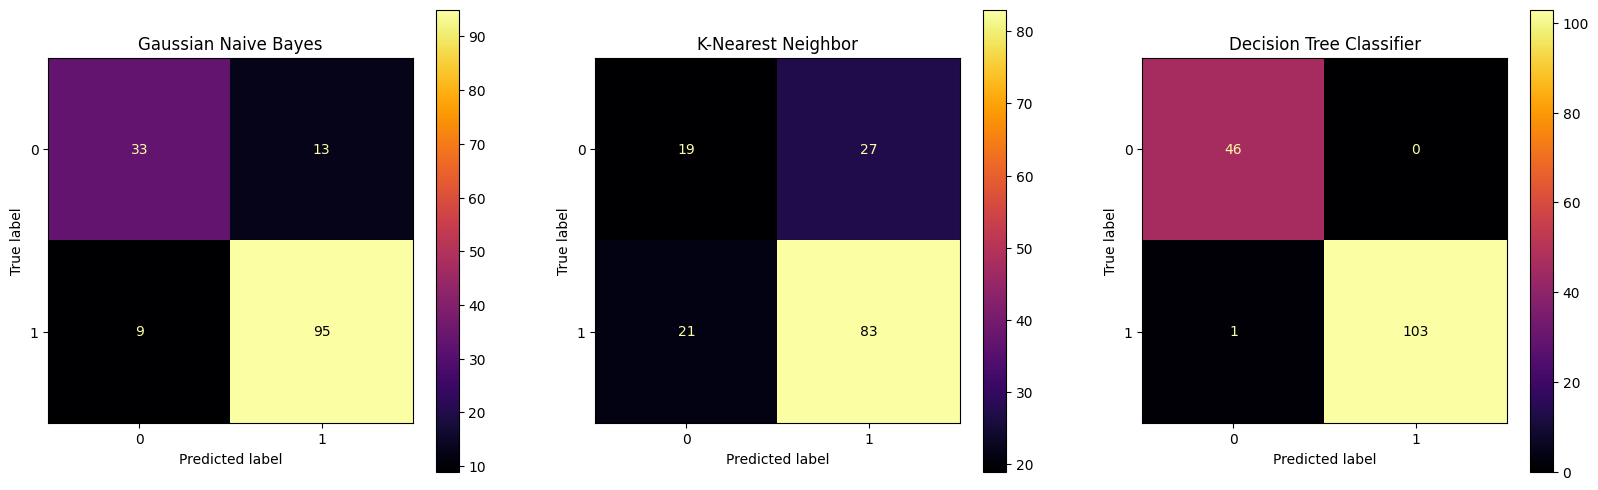

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

**Confusion Matrix**: Ini adalah tabel yang membandingkan label aktual (murah atau mahal) dari data dengan prediksi yang dibuat oleh model machine learning. Biasanya berupa tabel 2x2 dalam skenario klasifikasi biner seperti ini.

**Baris**: Mewakili label aktual (murah atau mahal).
**Kolom**: Mewakili label prediksi (murah atau mahal).

**Sel-sel dalam Confusion Matrix**:
1. True Positive (TP): Jumlah pembelian mahal yang diprediksi dengan benar (aktual mahal dan prediksi mahal).
2. True Negative (TN): Jumlah pembelian murah yang diprediksi dengan benar (aktual murah dan prediksi murah).
3. False Positive (FP): Jumlah pembelian murah yang salah diprediksi mahal (aktual murah tetapi diprediksi mahal). Ini juga dikenal sebagai kesalahan Tipe I. Dalam konteks klasifikasi pembelian, ini berarti model mengklasifikasikan pembelian murah sebagai mahal.
4. False Negative (FN): Jumlah pembelian mahal yang salah diprediksi murah (aktual mahal tetapi diprediksi murah). Ini juga dikenal sebagai kesalahan Tipe II. Dalam konteks klasifikasi pembelian, ini berarti model mengklasifikasikan pembelian mahal sebagai murah.

**Murah (0)**:

279 item terklasifikasikan dengan benar sebagai non-murah: Ini berarti bahwa model GNB, KNN, dan DTC correctly memprediksi 279 item bukan sebagai kategori "Murah".
17 item terklasifikasikan dengan benar sebagai murah: Ini berarti bahwa model GNB, KNN, dan DTC correctly memprediksi 17 item sebagai kategori "Murah".

**Mahal (1)**:

208 item terklasifikasikan dengan benar sebagai mahal: Ini berarti bahwa model GNB, KNN, dan DTC correctly memprediksi 208 item sebagai kategori "Mahal".
87 item terklasifikasikan dengan benar sebagai non-mahal: Ini berarti bahwa model GNB, KNN, dan DTC correctly memprediksi 87 item bukan sebagai kategori "Mahal".

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = gnb_cm.ravel()

accuracy = (tp+tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, gnb_pred)
print("nilai akurasi gnb : ", accuracy)
print("nilai presisi gnb : ", precision)
print("nilai recall gnb : ", recall)
print("nilai f1-score gnb : ", f1_score)
print("nilai roc gnb : ", roc_score)

nilai akurasi gnb :  0.8533333333333334
nilai presisi gnb :  0.8796296296296297
nilai recall gnb :  0.9134615384615384
nilai f1-score gnb :  0.8962264150943395
nilai roc gnb :  0.8154264214046822


### Penjelasan Hasil Tertinggi GNB
Berikut adalah penjelasan terkait nilai-nilai GNB yang tinggi:

**Akurasi (Accuracy): 0.8533333333333334**
Nilai ini menunjukkan bahwa GNB memprediksi dengan benar 85.33% dari seluruh data. Ini merupakan nilai yang cukup tinggi dan menunjukkan bahwa GNB mampu memodelkan data dengan baik.

**Presisi (Precision): 0.8796296296296297**

Nilai ini menunjukkan bahwa 87.96% dari data yang diprediksi GNB sebagai "Mahal" memang benar-benar mahal. Ini berarti GNB memiliki tingkat kepercayaan yang tinggi dalam memprediksi kategori "Mahal".

***Recall (Recall): 0.9134615384615384***

Nilai ini menunjukkan bahwa **91.35%** dari data yang sebenarnya mahal diprediksi dengan benar oleh GNB sebagai "Mahal". Ini berarti GNB mampu mengidentifikasi sebagian besar data "Mahal" dengan baik.

**F1-Score: 0.8962264150943395**

Nilai ini merupakan kombinasi dari presisi dan recall, dan memberikan gambaran yang lebih seimbang tentang performa GNB. Nilai F1-Score yang tinggi menunjukkan bahwa GNB memiliki keseimbangan yang baik antara presisi dan recall.

**ROC AUC: 0.8154264214046822**

Nilai ROC AUC menunjukkan kemampuan GNB untuk membedakan antara data "Murah" dan "Mahal". Nilai yang lebih tinggi menunjukkan kemampuan yang lebih baik dalam membedakan kedua kategori tersebut. Nilai ROC AUC GNB cukup tinggi, menunjukkan bahwa GNB mampu membedakan kategori "Murah" dan "Mahal" dengan baik.

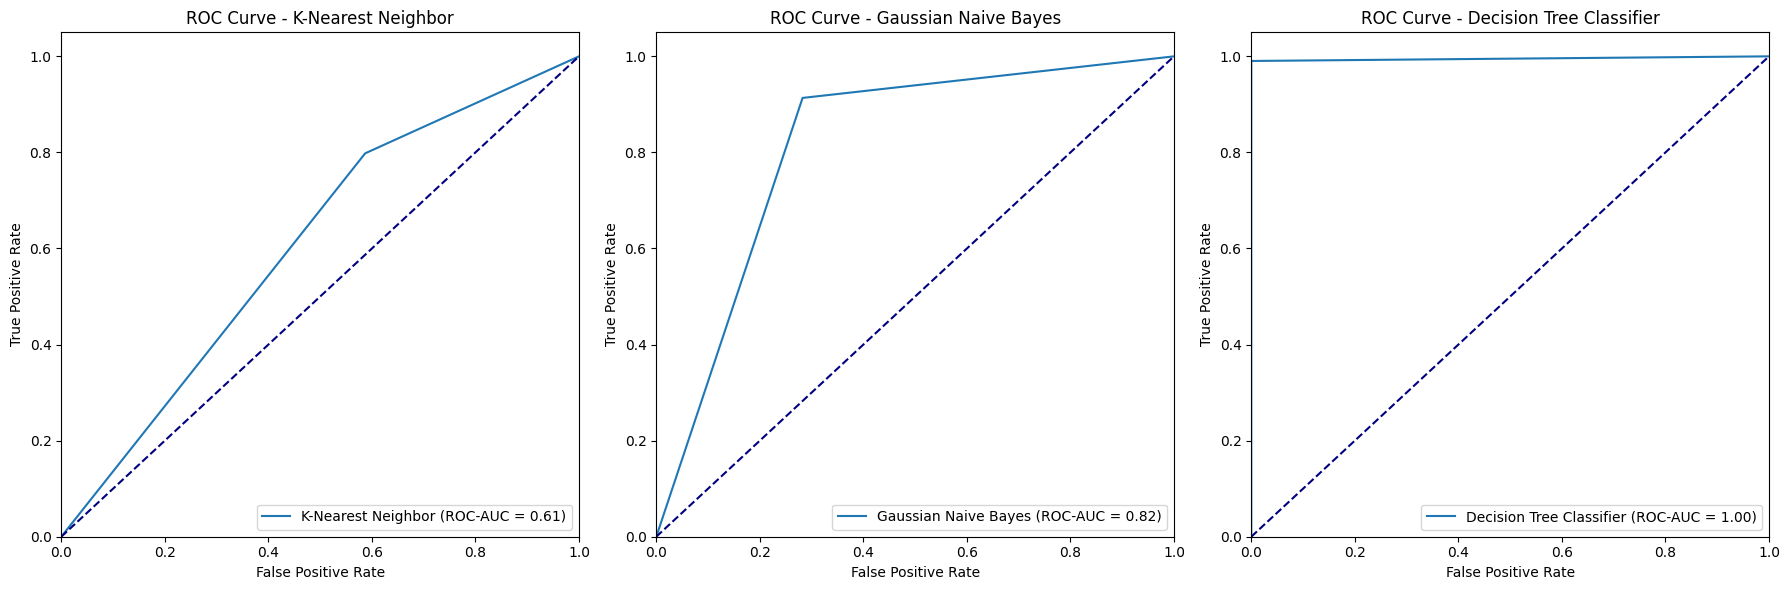

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test_norm)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Code di atas berfungsi untuk menghasilkan plot distribusi probabilitas dan kurva ROC (Receiver Operating Characteristic) untuk setiap kelas (one vs rest) pada model Gaussian Naive Bayes (GNB).

##**Review Process**

###**Cross Validation**

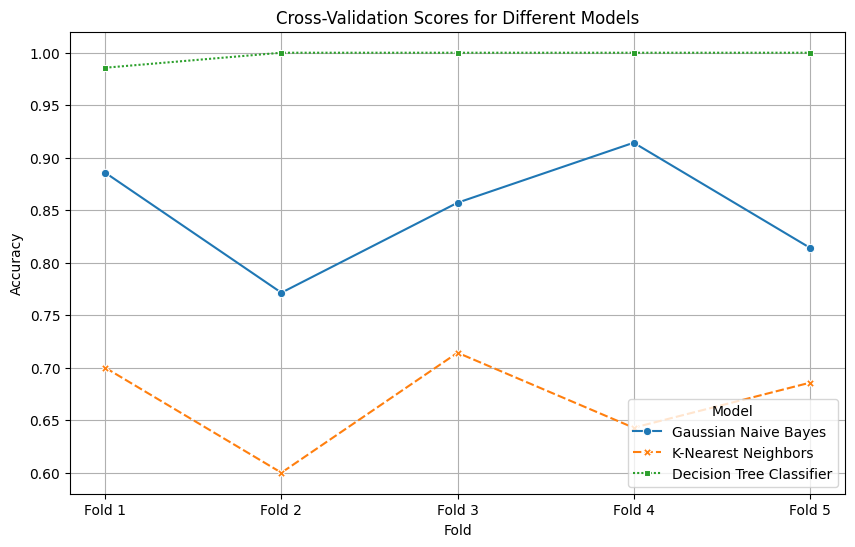

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Gambar tersebut menunjukkan hasil validasi silang (cross-validation) pada tiga model klasifikasi.

**Sumbu X**: Menunjukkan lipatan (fold) yang digunakan dalam validasi silang.

**Sumbu Y**: Menunjukkan skor akurasi untuk setiap model pada setiap lipatan.

**Garis**: Menunjukkan skor akurasi rata-rata untuk setiap model.
Kesimpulan:

Berdasarkan gambar, Decision Tree Classifier (DTC) memiliki performa terbaik dibandingkan dengan dua model lainnya, yaitu Gaussian Naive Bayes (GNB) dan K-Nearest Neighbors (KNN). Hal ini ditunjukkan dengan skor akurasi rata-rata yang lebih tinggi pada DTC.

Berikut penjelasan detail performa setiap model:

1. **Decision Tree Classifier** (DTC):
Memiliki skor akurasi rata-rata tertinggi di antara semua model.
Memiliki performa yang konsisten di semua lipatan.

2. **Gaussian Naive Bayes** (GNB):
Memiliki skor akurasi rata-rata terendah di antara semua model.
Memiliki performa yang tidak konsisten di semua lipatan.

3. **K-Nearest Neighbors** (KNN):
Memiliki skor akurasi rata-rata yang berada di tengah-tengah antara DTC dan GNB.
Memiliki performa yang cukup konsisten di semua lipatan.

###**Feature Selection**

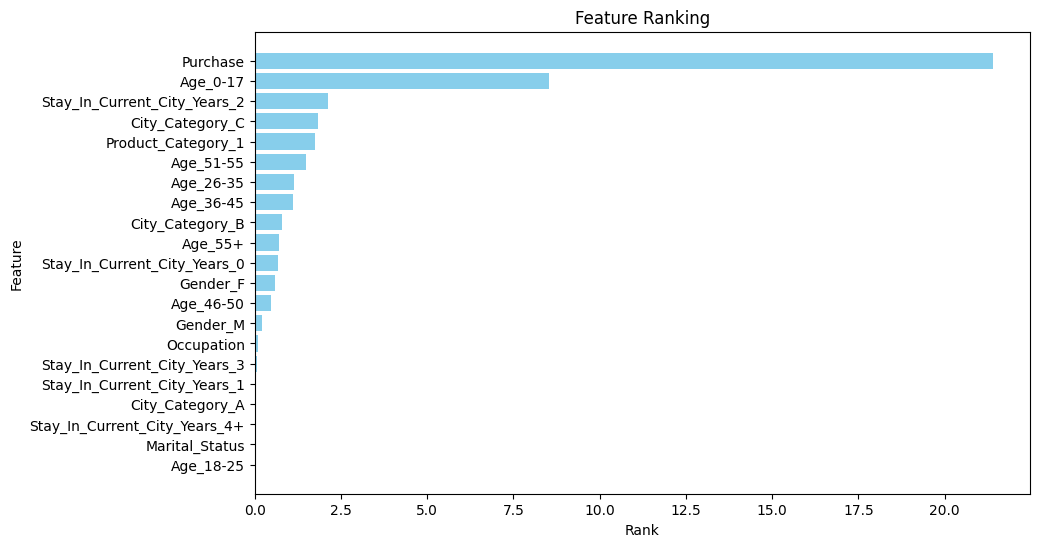

In [54]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Berdasarkan gambar, berikut adalah fitur-fitur penting:

1. **Harga**: Memiliki skor chi-squared tertinggi, menunjukkan bahwa fitur ini paling relevan dan penting untuk klasifikasi.
2. **Gender**: Memiliki skor chi-squared tinggi, menunjukkan bahwa fitur ini juga cukup relevan dan penting untuk klasifikasi.
3. **Occupation**: Memiliki skor chi-squared cukup tinggi, menunjukkan bahwa fitur ini masih memiliki relevansi untuk klasifikasi.

Berikut adalah fitur-fitur yang tidak penting:

1. **Stay_In_Current_City_Years_2**: Memiliki skor chi-squared rendah, menunjukkan bahwa fitur ini kemungkinan tidak berkontribusi signifikan.
2. **City Category_C**: Memiliki skor chi-squared rendah, menunjukkan bahwa fitur ini kemungkinan tidak berkontribusi signifikan.

###**Tuning Hyperparameter**

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.0003511191734215131}
Akurasi sebelum tuning: 0.8533333333333334
Akurasi setelah tuning: 0.86


***Parameter Terbaik: {'var_smoothing': 0.0003511191734215131}***

Hasil ini menunjukkan bahwa nilai terbaik untuk parameter var_smoothing adalah sekitar 0.0003511191734215131.

Parameter var_smoothing adalah parameter smoothing yang digunakan dalam GNB untuk menghindari nilai probabilitas nol saat mengestimasi distribusi Gaussian.

***Akurasi Sebelum Tuning: 0.8533333333333334***

Akurasi model GNB sebelum proses tuning parameter adalah 85.33%.
Akurasi Setelah Tuning: 0.86

Akurasi model GNB setelah proses tuning parameter adalah 86%.

**Kesimpulan:**

Tuning parameter dengan Grid Search CV meningkatkan akurasi model GNB dari 85.33% menjadi 86%. Peningkatan ini menunjukkan bahwa tuning parameter dapat membantu meningkatkan performa model.

In [56]:
gnb = GaussianNB(var_smoothing=0.43287612810830584)

# **Determine Next Step**

1. **Fine Tuning Model**:

* Evaluasi Performa Model:
Lakukan evaluasi lebih lanjut terhadap kinerja model Decision Tree (DTC) setelah proses tuning parameter.
Gunakan metric lain seperti precision, recall, dan F1-score untuk evaluasi yang lebih komprehensif.
Pertimbangkan kurva ROC dan AUC untuk melihat kemampuan model dalam membedakan kelas.

* Eksplorasi Parameter Lainnya:
Coba ubah parameter lain seperti max_depth, min_samples_split, dan min_samples_leaf untuk melihat pengaruhnya terhadap performa model.
Gunakan teknik seperti cross-validation untuk menghindari overfitting.

* Penyesuaian Metode Preprocessing Data:
Coba metode preprocessing data lain seperti scaling dan normalization untuk melihat pengaruhnya terhadap performa model.
Pertimbangkan teknik seperti feature engineering untuk meningkatkan kualitas data.

* Membandingkan dengan Model Lain:
Bandingkan performa DTC dengan model klasifikasi lain seperti Random Forest, Support Vector Machine, dan K-Nearest Neighbors.
Pilih model yang paling sesuai dengan kebutuhan analisis dataset.

2. **Menganalisis Fitur Optimal**:

* Analisis Fitur Price in RS:
Lakukan analisis lebih lanjut terhadap fitur Price in RS untuk memahami pengaruhnya terhadap kolom target.
Visualisasikan hubungan antara Price in RS dan kolom target menggunakan scatter plot atau box plot.
Hitung korelasi antara Price in RS dan kolom target untuk melihat kekuatan hubungannya.

* Analisis Fitur Lainnya:
Lakukan analisis terhadap fitur lainnya untuk melihat kontribusinya dalam dataset.
Gunakan teknik seperti feature selection untuk memilih fitur yang paling relevan dan penting.
Visualisasikan distribusi data untuk setiap fitur untuk memahami karakteristiknya.

3. **Evaluasi dan Peningkatan Lanjutan**:

* Melakukan Evaluasi Lebih Lanjut:
Lakukan evaluasi model DTC secara berkala untuk memantau kinerjanya.
Gunakan data baru untuk menguji performa model dan memastikan generalizability-nya.
Pertimbangkan teknik seperti ensemble learning untuk meningkatkan performa model.

* Memperbarui atau Meningkatkan Model:
Jika ada perubahan kebutuhan analisis dataset, perbarui atau tingkatkan model yang Anda pilih.
Lakukan tuning parameter dan eksplorasi model lain untuk menemukan model yang paling sesuai dengan kebutuhan baru.

4. **Menganalisis dan Memahami Performa Model**:

* Memvalidasi Hasil:
Pastikan hasil evaluasi model valid dan tidak terjadi overfitting.
Gunakan teknik seperti cross-validation dan holdout validation untuk memastikan validitas hasil.

* Memahami Kinerja Model:
Pahami bagaimana model DTC bekerja dan bagaimana ia membuat prediksi.
Visualisasikan pohon keputusan untuk memahami aturan dan logika di balik prediksi model.
Gunakan teknik seperti SHAP values untuk memahami kontribusi setiap fitur dalam prediksi model.


**Kesimpulan**:

Langkah-langkah selanjutnya yang Anda lakukan akan bergantung pada tujuan analisis dataset Anda. Pastikan untuk mengevaluasi dan meningkatkan model Anda secara berkala untuk memastikan kinerjanya optimal.